The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0592 - acc: 0.9368 - 20ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0410 - acc: 0.9757 - 18ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0058 - acc: 0.9801 - 17ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0071 - acc: 0.9832 - 18ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.2099 - acc: 0.9850 - 17ms/step          
Eval begin...
step 157/157 [==============================] - loss: 0.0055 - acc: 0.9832 - 13ms/step            
Eval samples: 10000
true label: 1, pred label: 1


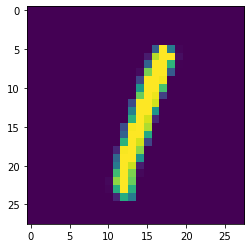

In [2]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

# 保存模型
model.save('./output/mnist')
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[5]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])



In [1]:
import torch
torch.cuda.is_available()

True

tensor([0, 0, 0, 0, 7, 8, 6, 8, 8, 7, 8, 8, 3, 9, 2, 0, 3, 0, 7, 9, 7, 2, 9, 8,
        1, 1, 4, 0, 2, 7, 5, 1, 8, 8, 9, 1, 7, 2, 8, 7, 1, 6, 7, 8, 8, 5, 5, 2,
        8, 9, 7, 7, 8, 0, 9, 7, 0, 1, 5, 6, 2, 5, 2, 9])


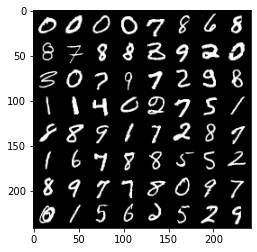

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch [1/5], Iter [100/937] Loss: 0.2662
Epoch [1/5], Iter [200/937] Loss: 0.0565
Epoch [1/5], Iter [300/937] Loss: 0.1664
Epoch [1/5], Iter [400/937] Loss: 0.0371
Epoch [1/5], Iter [500/937] Loss: 0.0168
Epoch [1/5], Iter [600/937] Loss: 0.0800
Epoch [1/5], Iter [700/937] Loss: 0.0235
Epoch [1/5], Iter [800/937] Loss: 0.0071
Epoch [1/5], Iter [900/

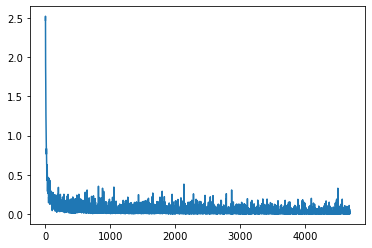

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import os
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# 如果运行报错启用本句
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
batch_size = 64
learning_rate = 0.001

# 将数据处理成Variable, 如果有GPU, 可以转成cuda形式
def get_variable(x):
    x = Variable(x)
    return x.cuda() if torch.cuda.is_available() else x
   # return nn.DataParallel(x, device_ids=[0])if torch.cuda.device_count() > 1 else x
   #如果有多个gpu时可以选择上面的语句，例如上面写的时设备0

train_dataset = datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

images, labels = next(iter(train_loader))
img = torchvision.utils.make_grid(images)
img = img.numpy().transpose(1, 2, 0)
print(labels)
plt.imshow(img)
plt.show()

# 两层卷积
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 使用序列工具快速构建
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7 * 7 * 32, 10)  

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.view(out.size(0), -1)  # reshape
        out = self.fc(out)
        return out

cnn = CNN()
if torch.cuda.is_available():
    cnn = cnn.cuda()

# 选择损失函数和优化方法
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
print(cnn)

num_epochs = 5
loss_all = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = get_variable(images)
        labels = get_variable(labels)  
        # print(labels)
        outputs = cnn(images)
        loss_all.append
        optimizer.zero_grad()  
        loss = loss_func(outputs, labels)

        loss.backward()  # 反向传播，自动计算每个节点的锑度至
        optimizer.step()
        loss_all.append(loss.item())
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))

torch.save(cnn.state_dict(), 'cnn.pkl')
plt.plot(range(np.array(loss_all).shape[0]),loss_all)
plt.show()
